# Instacart Final Analysis

1) Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Create Path
path = r"C:\Users\justi\02-24 Instacart Basket Analysis"

In [7]:
# Import data set
df_merged=pd.read_pickle(r"C:\Users\justi\02-24 Instacart Basket Analysis\02 Data\Prepared Data\df_merged.pkl")

In [8]:
# Import data set
df_instacart=pd.read_pickle(r"C:\Users\justi\02-24 Instacart Basket Analysis\02 Data\Prepared Data\df_instacart.pkl")

In [9]:
df_merged

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_order,...,First Name,Last Name,Gender,State,Age,Date_Joined,Dependants,Family_Status,Income,_merge2
0,1,Chocolate Sandwich Cookies,61,19,5.8,186761,186761,7,2,8,...,nan,Morse,Male,Wisconsin,49,5/28/2018,0,single,111493,both
1,1648,Chocolate Chip 1.4 oz Packs Cookies,61,19,4.8,186761,186761,7,2,8,...,nan,Morse,Male,Wisconsin,49,5/28/2018,0,single,111493,both
2,2745,Strawberry Explosion/Banana Split Smoothie,120,16,6.5,186761,186761,7,2,8,...,nan,Morse,Male,Wisconsin,49,5/28/2018,0,single,111493,both
3,4377,Bag of Oranges,24,4,10.9,186761,186761,7,2,8,...,nan,Morse,Male,Wisconsin,49,5/28/2018,0,single,111493,both
4,11081,Sweet Sliced Apples,123,4,3.2,186761,186761,7,2,8,...,nan,Morse,Male,Wisconsin,49,5/28/2018,0,single,111493,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827797,49683,Cucumber Kirby,83,4,13.2,168052,168052,17,6,15,...,Richard,Gregory,Male,Connecticut,48,11/15/2019,1,married,160413,both
1827798,49683,Cucumber Kirby,83,4,13.2,28941,28941,6,1,14,...,Tina,Whitney,Female,New Hampshire,20,9/23/2018,3,living with parents and siblings,100910,both
1827799,49683,Cucumber Kirby,83,4,13.2,129832,129832,10,1,19,...,Adam,Castro,Male,Mississippi,76,12/25/2019,0,divorced/widowed,35901,both
1827800,49683,Cucumber Kirby,83,4,13.2,91349,91349,7,1,9,...,Shirley,Harrison,Female,Delaware,54,10/30/2017,2,married,144839,both


In [10]:
df_instacart

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order,add_to_cart_order,reordered,_merge,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,3139998,28,6,11,3.0,5,0,both,28,Regular customer,6.980000,Low spender,3.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,1977647,30,6,17,20.0,1,1,both,30,Regular customer,8.475000,Low spender,20.0,Regular customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,389851,2,0,21,6.0,20,0,both,2,New customer,7.909677,Low spender,6.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,1813452,3,4,17,9.0,11,1,both,3,New customer,4.965000,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,1701441,16,1,7,26.0,7,0,both,16,Regular customer,7.087500,Low spender,26.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,3106363,10,4,14,30.0,17,0,both,10,New customer,8.841667,Low spender,30.0,Non-frequent customer
30328759,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,1788356,2,0,9,5.0,27,0,both,2,New customer,8.181818,Low spender,5.0,Frequent customer
30328760,49688,Fresh Foaming Cleanser,73,11,13.5,809510,809510,5,3,8,15.0,12,0,both,5,New customer,8.253333,Low spender,15.0,Regular customer
30328761,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,2359893,9,3,15,5.0,11,1,both,9,New customer,11.491667,High spender,5.0,Frequent customer


2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

This data set contains the personal information of user's of Instacart including FIrst Name, Last Name, Family Status and State of Residence. This personal information was necessary to glean the information requested from the stakeholder thus it was left included.

3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
#Create region column
df_merged['Region'] = 'West'

df_merged.loc[df_merged['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

df_merged.loc[df_merged['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

df_merged.loc[df_merged['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [12]:
df_merged['Region'].value_counts(dropna = False)

Region
South        610046
West         466172
Midwest      431260
Northeast    320324
Name: count, dtype: int64

In [13]:
df_merged[['State', 'Region']].head()

,State,Region
0,Wisconsin,Midwest
1,Wisconsin,Midwest
2,Wisconsin,Midwest
3,Wisconsin,Midwest
4,Wisconsin,Midwest


In [14]:
df_merged[['State', 'Region']].tail()

,State,Region
1827797,Connecticut,Northeast
1827798,New Hampshire,Northeast
1827799,Mississippi,South
1827800,Delaware,South
1827801,Montana,West


In [15]:
# Create high spend filter
high_spenders = df_instacart[df_instacart['spending_flag'] == 'High spender']

In [16]:
# Create low spend filter
low_spenders = df_instacart[df_instacart['spending_flag'] == 'Low spender']

In [17]:
# Group by region
high_spenders_counts = high_spenders.groupby(df_merged['Region']).size()
low_spenders_counts = low_spenders.groupby(df_merged['Region']).size()

In [18]:
high_spenders_counts

Region
Midwest      22729
Northeast    16924
South        32190
West         24616
dtype: int64

In [19]:
low_spenders_counts

Region
Midwest      408531
Northeast    303400
South        577856
West         441556
dtype: int64

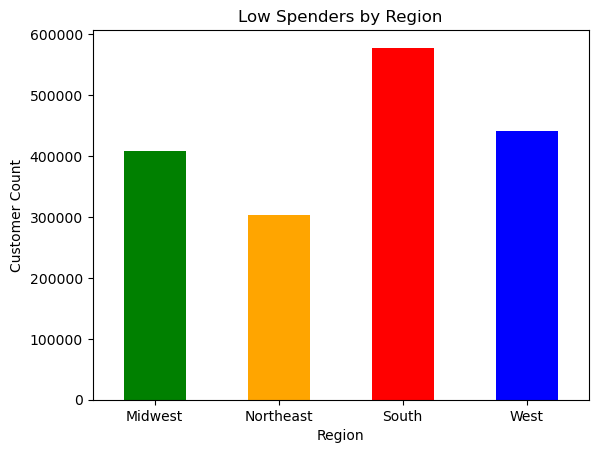

In [20]:
bar_regional_low_spenders = low_spenders_counts.plot.bar(color = ['green', 'orange', 'red', 'blue'])
plt.title('Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()

In [21]:
#export to visualizations folder
bar_regional_low_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_low_spenders_4.10_task.png'))

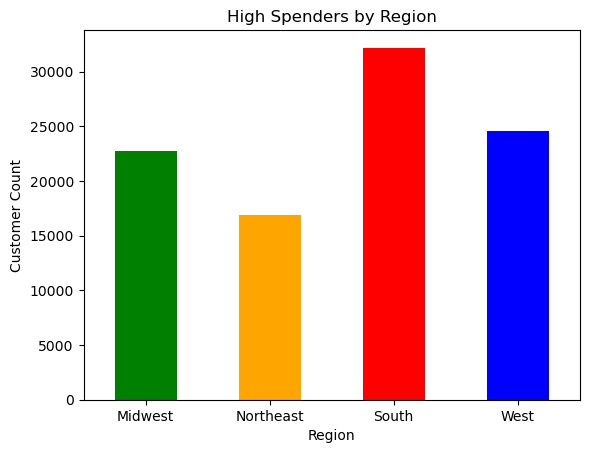

In [22]:
bar_regional_high_spenders = high_spenders_counts.plot.bar(color= ['green', 'orange', 'red', 'blue'])
plt.title('High Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()

In [23]:
# Export to visualization folder
bar_regional_high_spenders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_regional_high_spenders_4.10_task.png'))

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [24]:
# Create exclusion flag for users with > 5 orders
df_instacart['exclusion_flag']=df_instacart['max_order']<5

In [25]:
df_instacart['exclusion_flag'].value_counts()

exclusion_flag
False    24414877
True      5913886
Name: count, dtype: int64

In [26]:
# Create new data set excluding users with > 5 orders
df_instacart_new=df_instacart[~df_instacart['exclusion_flag']]

In [27]:
df_instacart_new.shape

(24414877, 21)

In [28]:
df_instacart_new['max_order'].describe()

count    2.441488e+07
mean     2.194990e+01
std      1.771938e+01
min      5.000000e+00
25%      9.000000e+00
50%      1.600000e+01
75%      2.900000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [29]:
df_instacart_new.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_instacart_new.pkl'))

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [30]:
#Create age category
df_merged['Age'].describe()

count    1.827802e+06
mean     4.951219e+01
std      1.845684e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [31]:
df_merged['age_group']='unknown'

In [32]:
df_merged.loc[(df_merged['Age'] >= 18) & (df_merged['Age'] <= 28), 'age_group'] = 'Young Adult'

In [33]:
df_merged.loc[(df_merged['Age'] >= 29) & (df_merged['Age'] <= 40), 'age_group'] = 'Adult'

In [34]:
df_merged.loc[(df_merged['Age'] >= 41) & (df_merged['Age'] <= 55), 'age_group'] = 'Middle-Aged'

In [35]:
df_merged.loc[(df_merged['Age'] >= 56) & (df_merged['Age'] <= 70), 'age_group'] = 'Senior'

In [36]:
df_merged.loc[(df_merged['Age'] >= 71) & (df_merged['Age'] <= 82), 'age_group'] = 'Elderly'

In [37]:
df_merged['age_group'].value_counts()

age_group
Middle-Aged    434891
Senior         425100
Adult          341054
Elderly        314673
Young Adult    312084
Name: count, dtype: int64

In [38]:
age_group_percent = (df_merged['age_group'].value_counts(normalize=True) * 100).sort_index()

In [39]:
age_group_percent

age_group
Adult          18.659242
Elderly        17.215924
Middle-Aged    23.793113
Senior         23.257443
Young Adult    17.074278
Name: proportion, dtype: float64

Text(0.5, 1.0, 'User Age Groups')

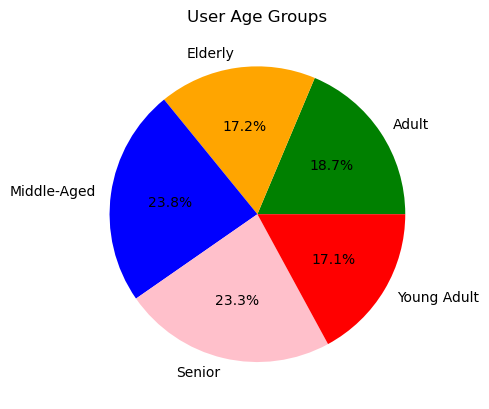

In [45]:
plt.pie(age_group_percent, labels=age_group_percent.index, autopct='%1.1f%%',  colors=['green', 'orange', 'blue', 'pink', 'red'])
plt.title('User Age Groups')

In [47]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_pie.png'))

<Figure size 640x480 with 0 Axes>

In [38]:
# Create income category
df_merged['Income'].describe()

count    1.827802e+06
mean     9.473714e+04
std      4.240738e+04
min      2.591100e+04
25%      5.997200e+04
50%      9.369300e+04
75%      1.242380e+05
max      5.939010e+05
Name: Income, dtype: float64

In [39]:
low_income_threshold = 50000

In [40]:
high_income_threshold = 100000

In [41]:
df_merged['income_category'] = pd.cut(
    df_merged['Income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['Low Income', 'Middle Income', 'High Income'],
    include_lowest=True)

In [42]:
df_merged.shape

(1827802, 33)

In [43]:
df_merged['income_category'].value_counts()

income_category
High Income      775754
Middle Income    752496
Low Income       299552
Name: count, dtype: int64

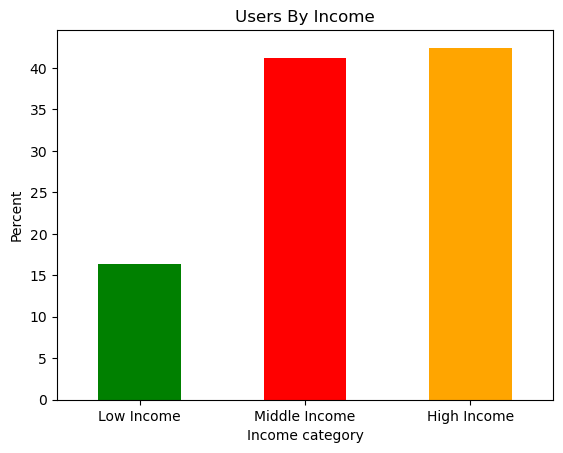

In [44]:
# Create Bar chart for income
users_by_income = (df_merged['income_category'].value_counts(normalize=True) * 100).sort_index()
users_by_income.plot.bar(color=['green', 'red', 'orange'])
plt.xlabel('Income category')
plt.ylabel('Percent')
plt.title('Users By Income')
plt.xticks(rotation=0)
plt.show()


In [45]:
# Save as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_users_by_income.png'))

<Figure size 640x480 with 0 Axes>

In [46]:
#Creating dependant flag
df_merged['dependant_mean']=df_merged.groupby(['user_id'])['Dependants'].transform('mean')

In [47]:
df_merged.loc[df_merged['dependant_mean']>0, 'dependant_flag'] ='with dependants'

In [48]:
df_merged.loc[df_merged['dependant_mean']<=0, 'dependant_flag'] ='without dependants'

In [49]:
df_merged['dependant_flag'].value_counts(dropna=False)

dependant_flag
with dependants       1369876
without dependants     457926
Name: count, dtype: int64

In [50]:
df_merged['dependant_flag'].head()

0    without dependants
1    without dependants
2    without dependants
3    without dependants
4    without dependants
Name: dependant_flag, dtype: object

In [51]:
df_merged.dtypes

product_id                       int64
product_name                    object
aisle_id                         int64
department_id                    int64
prices                         float64
order_id                         int64
user_id                          int64
order_number                     int64
orders_day_of_week               int64
hour_of_order                    int64
days_since_prior_order         float64
add_to_cart_order                int64
reordered                        int64
_merge                        category
max_order                        int64
loyalty_flag                    object
mean_product_price             float64
spending_flag                   object
median_days_between_orders     float64
order_frequency                 object
First Name                      object
Last Name                       object
Gender                          object
State                           object
Age                              int64
Date_Joined              

In [52]:
df_merged['income_category'] = df_merged['income_category'].astype(str)
df_merged['dependant_flag']= df_merged['dependant_flag'].astype(str)

(array([0, 1, 2]),
 [Text(0, 0, 'New customer'),
  Text(1, 0, 'Regular customer'),
  Text(2, 0, 'Loyal customer')])

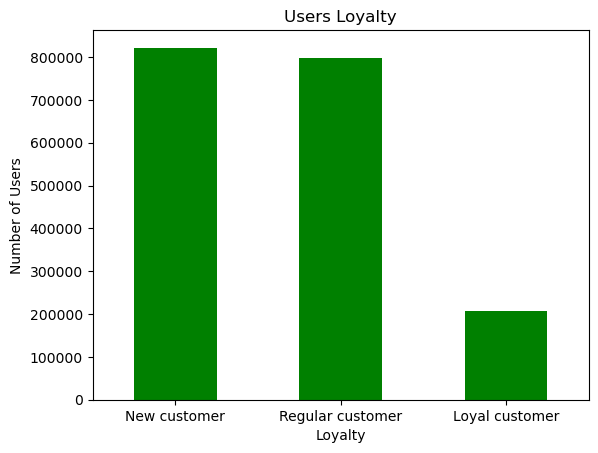

In [53]:
bar_users_loyalty = df_merged['loyalty_flag'].value_counts().plot.bar(title = 'Users Loyalty', xlabel = 'Loyalty', ylabel = 'Number of Users', color = 'green')
plt.xticks(rotation=0)


In [54]:
# Create customer profile
df_merged['customer_profile'] =  df_merged['age_group'] + ', ' + df_merged['income_category'] + ', ' + df_merged['dependant_flag']

In [55]:
df_merged['customer_profile'].head()

0    Middle-Aged, High Income, without dependants
1    Middle-Aged, High Income, without dependants
2    Middle-Aged, High Income, without dependants
3    Middle-Aged, High Income, without dependants
4    Middle-Aged, High Income, without dependants
Name: customer_profile, dtype: object

In [56]:
df_merged.shape

(1827802, 36)

In [57]:
df_merged['customer_profile'].value_counts()

customer_profile
Middle-Aged, High Income, with dependants         209368
Senior, High Income, with dependants              206867
Adult, Middle Income, with dependants             192659
Young Adult, Middle Income, with dependants       176576
Elderly, High Income, with dependants             153140
Middle-Aged, Middle Income, with dependants        72376
Middle-Aged, High Income, without dependants       69704
Senior, Middle Income, with dependants             69236
Senior, High Income, without dependants            68690
Adult, Middle Income, without dependants           64324
Young Adult, Middle Income, without dependants     58926
Adult, Low Income, with dependants                 55756
Elderly, Middle Income, with dependants            52686
Elderly, High Income, without dependants           50796
Young Adult, Low Income, with dependants           50693
Middle-Aged, Low Income, with dependants           44486
Senior, Low Income, with dependants                42147
Elderly, Low I

In [58]:
df_merged['customer_profile'].describe()

count                                       1827802
unique                                           30
top       Middle-Aged, High Income, with dependants
freq                                         209368
Name: customer_profile, dtype: object

In [59]:
#Group customer profile and prices
customer_profile_revenue =df_merged.groupby('customer_profile')['prices'].sum()

In [60]:
# Sort
customer_profile_revenue_sorted = customer_profile_revenue.sort_values(ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

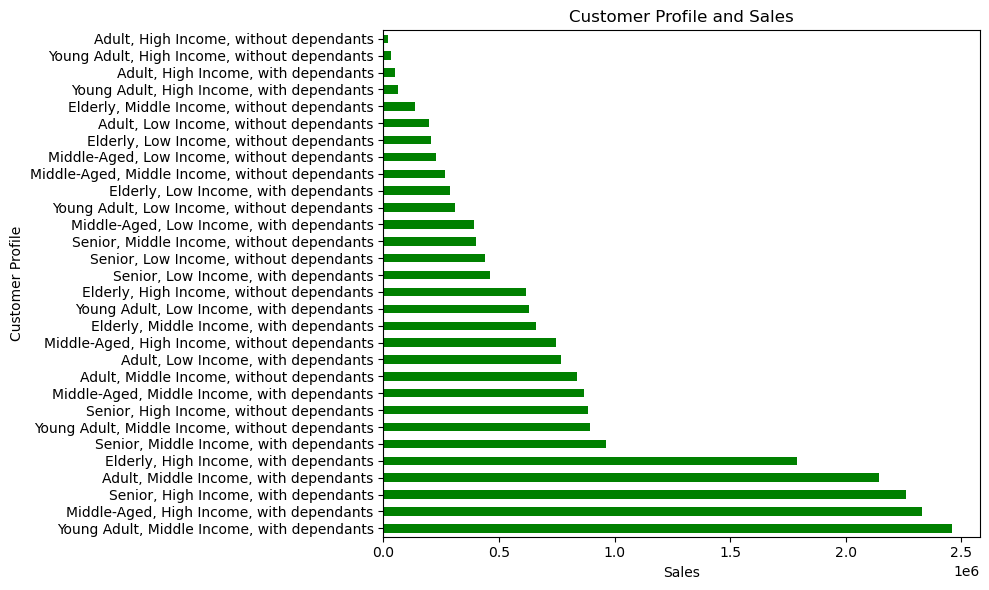

In [61]:
#Create Bar chart for sales and customer profiles
bar_customer_profile_sales = customer_profile_revenue_sorted.plot.barh(title = 'Customer Profile and Sales', xlabel = 'Sales', ylabel = 'Customer Profile', color = 'green')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show

In [62]:
# Save as png
bar_customer_profile_sales.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profiles_sales.png'))

In [63]:
#Group customer profile with hour of order
hour_of_order = df_merged.groupby(['customer_profile', 'hour_of_order']).size().unstack()

In [64]:
customer_profile_order_hours_mode = df_merged.groupby('customer_profile')['hour_of_order'].apply(lambda x: x.mode().iloc[0])

In [65]:
plot_data = pd.DataFrame({'customer_profile': customer_profile_order_hours_mode.index, 'customer_profile_order_hours_mode': customer_profile_order_hours_mode.values})

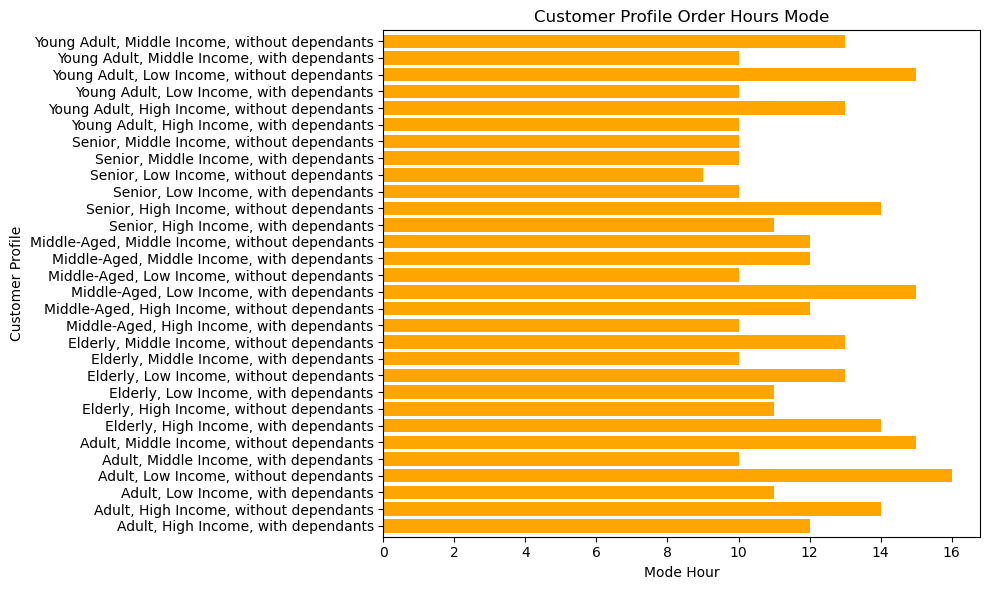

In [66]:
customer_profile_order_hours_mode_bar = plot_data.plot(kind='barh', x='customer_profile', y='customer_profile_order_hours_mode', color='orange', legend=False, title='Customer Profile Order Hours Mode', xlabel='Mode Hour', ylabel='Customer Profile', width=0.8)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show()

In [67]:
customer_profile_order_hours_mode_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_order_hours_mode_bar.png'))

In [68]:
# Map department id to names
department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [69]:
df_merged['department_name']= df_merged['department_id'].map(department_mapping).fillna("missing")

In [70]:
df_merged['department_name'].head()

0        snacks
1        snacks
2    dairy eggs
3       produce
4       produce
Name: department_name, dtype: object

In [71]:
df_merged.shape

(1827802, 37)

In [72]:
df_merged['department_name'].value_counts()

department_name
produce            535763
dairy eggs         305301
snacks             163163
beverages          151858
frozen             125589
pantry             104835
bakery              65910
canned goods        59926
deli                59346
dry goods pasta     48233
household           41383
meat seafood        39975
breakfast           39546
personal care       25198
babies              24474
international       15336
alcohol              8343
pets                 5599
missing              4009
other                2039
bulk                 1976
Name: count, dtype: int64

In [73]:
loyal_dept_group = df_merged.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [74]:
loyal_dept_group = loyal_dept_group.sort_values(by = 'Regular customer', ascending = False)

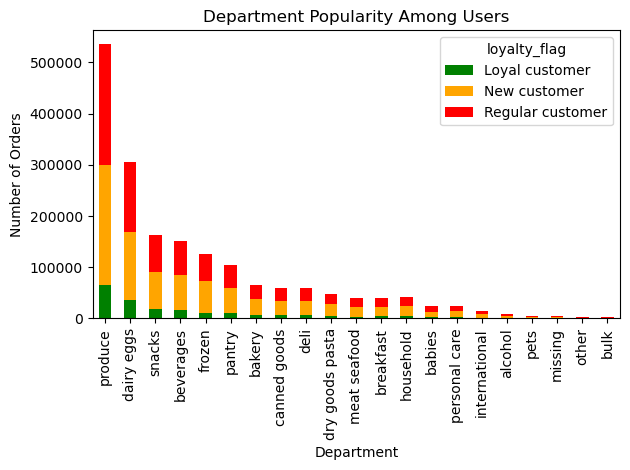

In [75]:
# Create bar chart
colors = ['green', 'orange','red']
loyal_dept_group = loyal_dept_group.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity Among Users')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


In [76]:
loyal_dept_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_dept_group.png'))

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [77]:
#aggregate customer profile
aggregate_customer_profile = df_merged.groupby('user_id').agg({
    'Age':['max','mean','min'],
    'Dependants':['max','mean','min']
})

In [78]:
aggregate_customer_profile.reset_index(inplace=True)

In [79]:
#rename columns
aggregate_customer_profile.columns = ['user_id', 'max_age', 'mean_age', 'min_age', 'max_dependants', 'mean_dependants', 'min_dependants']

In [80]:
print(aggregate_customer_profile)

        user_id  max_age  mean_age  min_age  max_dependants  mean_dependants  \
0             2       68      68.0       68               3              3.0   
1             3       33      33.0       33               3              3.0   
2             4       31      31.0       31               3              3.0   
3             5       75      75.0       75               0              0.0   
4             6       48      48.0       48               1              1.0   
...         ...      ...       ...      ...             ...              ...   
181231   206202       51      51.0       51               3              3.0   
181232   206204       26      26.0       26               2              2.0   
181233   206206       25      25.0       25               2              2.0   
181234   206207       76      76.0       76               1              1.0   
181235   206209       74      74.0       74               3              3.0   

        min_dependants  
0             

8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [81]:
# Group department_name with region
dept_by_region = df_merged.groupby(['department_name','Region']).size().unstack()

In [82]:
#Sort
dept_by_region = dept_by_region.sort_values(by = 'Midwest', ascending = False)

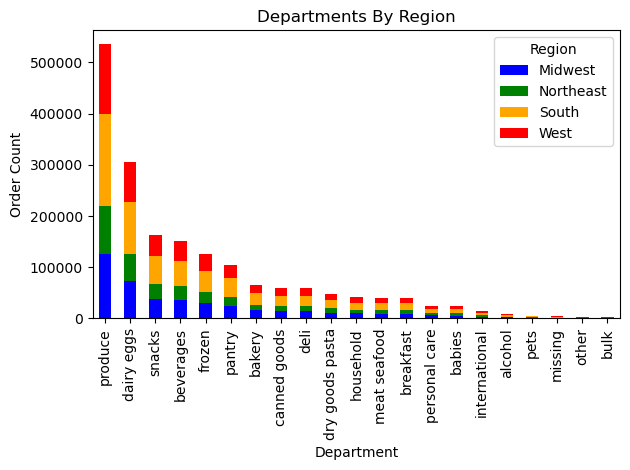

In [83]:
# Bar chart
colors = ['blue', 'green','orange', 'red']
dept_by_region_bar = dept_by_region.plot(kind='bar', stacked=True, color=colors)
plt.title('Departments By Region')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

In [84]:
dept_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_by_region_bar.png'))

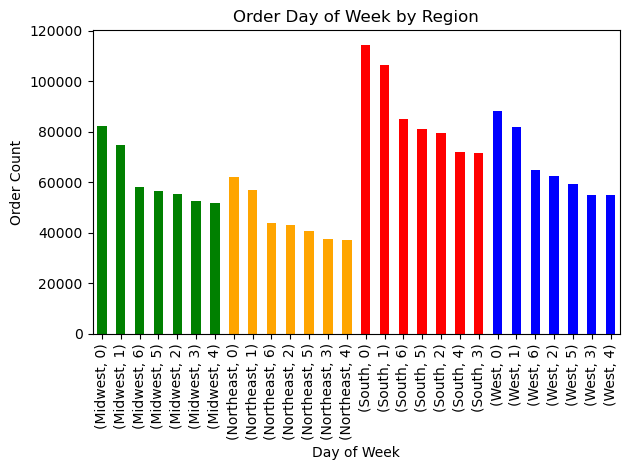

In [85]:
region_order_day_bar =df_merged.groupby('Region')['orders_day_of_week'].value_counts().plot.bar(title = 'Order Day of Week by Region', xlabel = 'Day of Week', ylabel = 'Order Count', color=['green'] * 7 + ['orange'] * 7+['red'] * 7 + ['blue'] * 7)
plt.tight_layout()

In [86]:
region_order_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_order_day_bar.png'))

In [87]:
#Crosstab
avg_price_by_region = pd.crosstab(index=df_merged['Region'], columns='Average Price', values=df_merged['prices'], aggfunc='mean')

<function matplotlib.pyplot.show(close=None, block=None)>

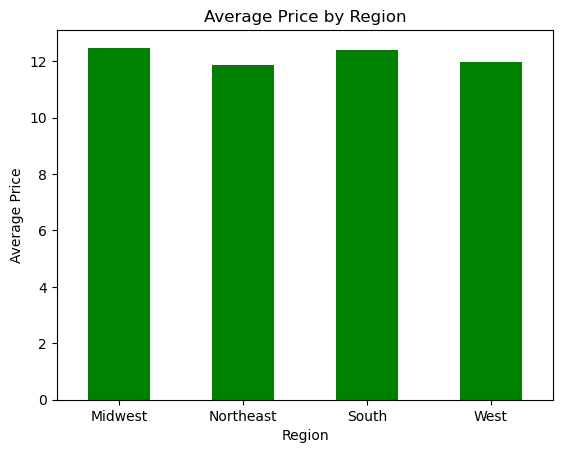

In [88]:
#Create bar chart
avg_price_by_region_bar = avg_price_by_region.plot(kind='bar', color='green', legend=None)
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show

In [89]:
avg_price_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'avg_price_by_region_bar.png'))

In [90]:
#top 10 departments
department_counts = df_merged['department_name'].value_counts()

In [91]:
top_departments=department_counts.head(10).index

In [92]:
# Group
df_merged['department_grouped'] = df_merged['department_name'].where(df_merged['department_name'].isin(top_departments))

In [93]:
# Calculating percentages
department_percentage = df_merged['department_grouped'].value_counts(normalize=True) * 100

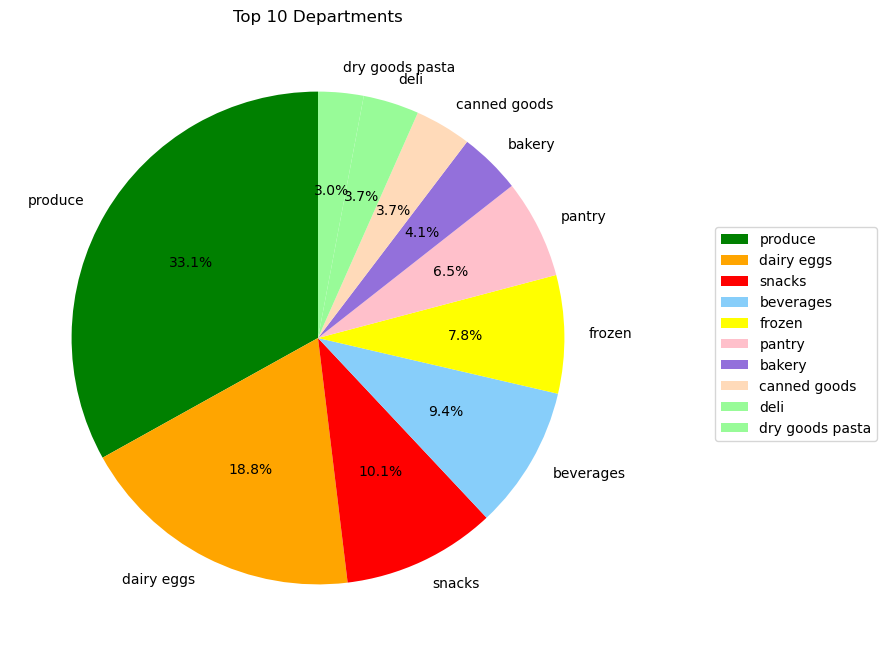

In [94]:
#Create pie
fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(department_percentage, labels=department_percentage.index, autopct='%1.1f%%', startangle=90, colors=['green', 'orange', 'red', 'lightskyblue', 'yellow', 'pink', 'mediumpurple', 'peachpuff','palegreen','palegreen'])

ax.legend(pie[0], department_percentage.index, bbox_to_anchor=(1, 0.5), loc="center left", fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.title('Top 10 Departments', )
plt.show()

In [95]:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments_pie_chart.png')

In [96]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged1.pkl'))

In [5]:
df_merged.shape

(1827802, 30)

In [7]:
df_instacart.shape

(30328763, 20)

In [49]:
df_instacart_new['prices'].describe()

count    2.441488e+07
mean     1.182839e+01
std      4.873710e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [51]:
department_popularity = (df_instacart_new['prices'].value_counts(normalize=True) * 100).sort_index()

In [52]:
department_popularity

prices
1.0        0.352338
1.1        0.755253
1.2        0.761077
1.3        1.324610
1.4        1.230827
             ...   
24.8       0.001159
24.9       0.017055
25.0       0.041507
14900.0    0.013115
99999.0    0.002085
Name: proportion, Length: 242, dtype: float64

In [3]:
ords_prods_merge=pd.read_pickle(r"C:\Users\justi\02 Data\Pickles\Task 4.7 Deriving New Variables.pkl")

In [4]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,3139998,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,1977647,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,389851,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders
3,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,1813452,3,4,17,9.0,11,1,both,Mid-range product,Least busy,Slowest days,Average orders
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,1701441,16,1,7,26.0,7,0,both,Mid-range product,Regularly busy,Busiest days,Average orders


In [5]:
ords_prods_merge['price_range_loc'].value_counts()

price_range_loc
Mid-range product     20462144
Low-range product      9476774
High-range product      389845
Name: count, dtype: int64

In [6]:
price_range_percent = (ords_prods_merge['price_range_loc'].value_counts(normalize=True) * 100).sort_index()

In [7]:
price_range_percent

price_range_loc
High-range product     1.285397
Low-range product     31.246820
Mid-range product     67.467783
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Products Grouped By Price')

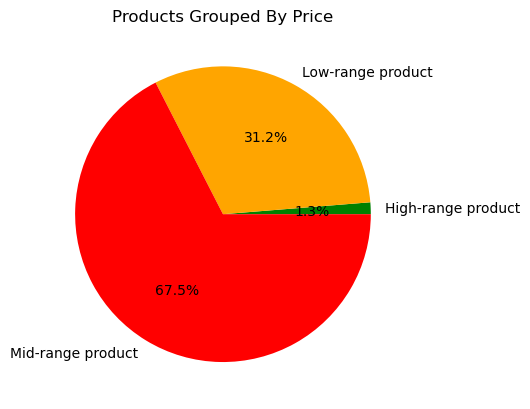

In [8]:
plt.pie(price_range_percent, labels=price_range_percent.index, autopct='%1.1f%%',  colors=['green', 'orange', 'red'])
plt.title('Products Grouped By Price')

In [10]:
path = r"C:\Users\justi\Instacart Basket Analysis"

In [11]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'products_by_price_pie.png'))

<Figure size 640x480 with 0 Axes>